In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm

# load data
npz = np.load('sstu_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
sstu = npz["sstu"]
coast = npz["coast"]
lonc = npz["lonc"]
latc = npz["latc"]
time = npz["time"]
sstc = npz["sstc"]


npz = np.load('ekman_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
last_slice = npz["etransport"][:, :, 0] * 86400             
etransport = np.broadcast_to(last_slice[..., None],          
                             npz["etransport"].shape)
epumping = npz["epumping"]*86400

npz = np.load('chlc_1998_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
chlc = npz["chlc"]

npz = np.load('fesom_core2_sstu_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
sstu_fjra = npz["sstu"]

npz = np.load('fesom_core2_fcore2_sstu_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
sstu_fcore2 = npz["sstu"]

npz = np.load('fesom_core2_fera5_sstu_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
sstu_fera5 = npz["sstu"]

npz = np.load('fesom_tropotest_fjra_sstu_m_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
sstu_tropo = npz["sstu"]

sstum=np.mean(sstu.reshape(int(sstu.shape[0]/12),12,sstu.shape[1],sstu.shape[2]), axis=0)
etransportm=np.mean(etransport.reshape(int(etransport.shape[0]/12),12,etransport.shape[1],etransport.shape[2]), axis=0)
epumpingm=np.mean(epumping.reshape(int(etransport.shape[0]/12),12,etransport.shape[1],etransport.shape[2]), axis=0)
chlcm=np.nanmean(chlc.reshape(int(chlc.shape[0]/12),12,chlc.shape[1],chlc.shape[2]), axis=0)

latitudes = np.mean(latc, axis=1)  
sstum.shape

# load data
npz = np.load('fesom_core2_fjra_sstu_m_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
sstu_fesom = npz["sstu"]


npz = np.load('fesom_core2_fjra_ekman_m_1993_2022.npz', allow_pickle=True)
print("Keys in the npz file:", npz.keys())
last_slice = npz["etransport"][:, :, 0] * 86400             
etransport_fesom = np.broadcast_to(last_slice[..., None],          
                             npz["etransport"].shape)
epumping_fesom = npz["epumping"]*86400

sstu_fesom=np.mean(sstu_fesom.reshape(int(sstu_fesom.shape[0]/12),12,sstu_fesom.shape[1],sstu_fesom.shape[2]), axis=0)
etransport_fesom=np.mean(etransport_fesom.reshape(int(etransport_fesom.shape[0]/12),12,etransport_fesom.shape[1],etransport_fesom.shape[2]), axis=0)
epumping_fesom=np.mean(epumping_fesom.reshape(int(epumping_fesom.shape[0]/12),12,epumping_fesom.shape[1],epumping_fesom.shape[2]), axis=0)


Keys in the npz file: KeysView(NpzFile 'sstu_1993_2022.npz' with keys: lon, lat, sstu, sstc, coast...)
Keys in the npz file: KeysView(NpzFile 'ekman_1993_2022.npz' with keys: etransport, epumping)
Keys in the npz file: KeysView(NpzFile 'chlc_1998_2022.npz' with keys: chlc)
Keys in the npz file: KeysView(NpzFile 'fesom_core2_sstu_1993_2022.npz' with keys: lon, lat, sstu, sstc, coast...)
Keys in the npz file: KeysView(NpzFile 'fesom_core2_fcore2_sstu_1993_2022.npz' with keys: lon, lat, sstu, sstc, coast...)
Keys in the npz file: KeysView(NpzFile 'fesom_core2_fera5_sstu_1993_2022.npz' with keys: lon, lat, sstu, sstc, coast...)
Keys in the npz file: KeysView(NpzFile 'fesom_tropotest_fjra_sstu_m_1993_2022.npz' with keys: lon, lat, sstu, sstc, coast...)
Keys in the npz file: KeysView(NpzFile 'fesom_core2_fjra_sstu_m_1993_2022.npz' with keys: lon, lat, sstu, sstc, coast...)
Keys in the npz file: KeysView(NpzFile 'fesom_core2_fjra_ekman_m_1993_2022.npz' with keys: windspeed, etransport, epumpi

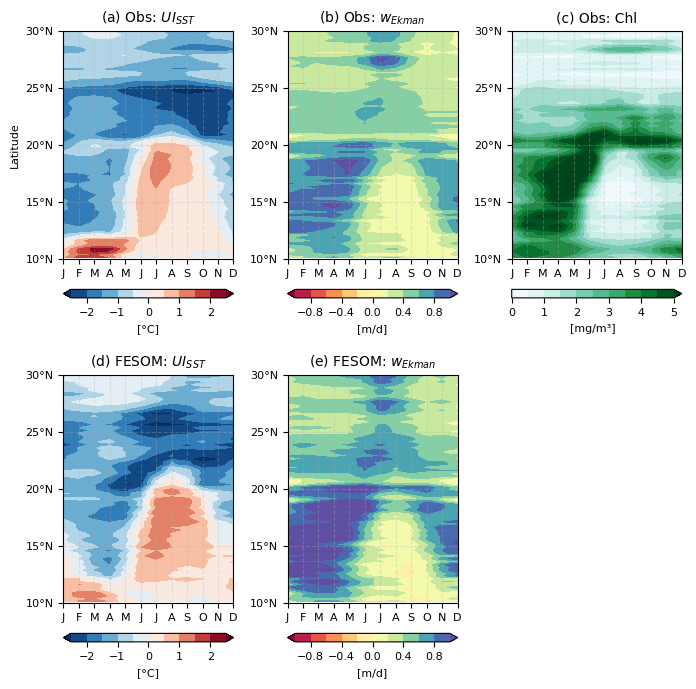

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 选择 10°N 到 25°N 之间的数据
lat_min, lat_max = 10, 30
lat_mask = (latitudes >= lat_min) & (latitudes <= lat_max)
latitudes_subset = latitudes[lat_mask]  # 选取符合范围的纬度

fig, axes = plt.subplots(2, 3, figsize=(7, 7))
plt.rcParams.update({
    "font.size": 8,
})
labels = [r'(a) Obs: $UI_{SST}$', r'(b) Obs: $w_{Ekman}$', '(c) Obs: Chl', r'(d) FESOM: $UI_{SST}$', r'(e) FESOM: $w_{Ekman}$']
datasets = [sstum, etransportm+epumpingm, chlcm[:,:,8:], sstu_fesom, etransport_fesom+epumping_fesom]  # 每个子图对应的数据
colormaps = ['RdBu_r', 'Spectral', 'BuGn', 'RdBu_r', 'Spectral']  # 每个变量使用不同的 colormap
month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
cl = [2.5, 1, (0, 5), 2.5, 1]  # Chl 设定固定范围 (0,6)
colorbar_labels = ['[°C]', '[m/d]', '[mg/m³]', '[°C]', '[m/d]']  # Colorbar 的单位

plt.rcParams.update({   
    "font.size": 8,
})

for i, (data, title, cmap, cbar_label, ax) in enumerate(zip(datasets, labels, colormaps, colorbar_labels, axes.flatten())):
    hov_data = np.nanmean(data, axis=-1)  # 沿最后一个维度取平均
    hov_data_subset = hov_data[:, lat_mask]  # 只取纬度 10-25°N 对应的数据
    
    # 设置 colorbar 范围
    if isinstance(cl[i], tuple):  # 针对 Chl 设定 (0,6)
        levels = np.linspace(cl[i][0], cl[i][1], 11)
        extend_option = 'max'  # 只在最大值方向扩展
    else:
        levels = np.linspace(-cl[i], cl[i], 11)
        extend_option = 'both'  # 其他变量两端都扩展

    c = ax.contourf(np.arange(12), latitudes_subset, hov_data_subset.T, 
                    levels=levels, extend=extend_option, cmap=cmap)
    
    ax.set_title(title, fontsize=10)
    # ax.set_xlabel('Month')
    ax.set_xticks(np.arange(12))
    ax.set_xticklabels(month_labels)
    ax.set_ylim(lat_min, lat_max)  # 限制纬度范围
    if i == 0:
        ax.set_ylabel('Latitude')
    ax.set_yticks(np.arange(lat_min, lat_max + 1, 5))
    ax.set_yticklabels([f'{int(lat)}°N' for lat in np.arange(lat_min, lat_max + 1, 5)])
    # 添加 colorbar 并设置单位
    cbar = fig.colorbar(c, ax=ax, orientation='horizontal', pad=0.1)
    cbar.set_label(cbar_label)  # 设置 colorbar 的 label 为单位
    ax.grid(True, linestyle='--', alpha=0.3)

axes.flatten()[-1].axis('off')
plt.tight_layout()
plt.savefig("fig2.png", dpi=300)
plt.show()

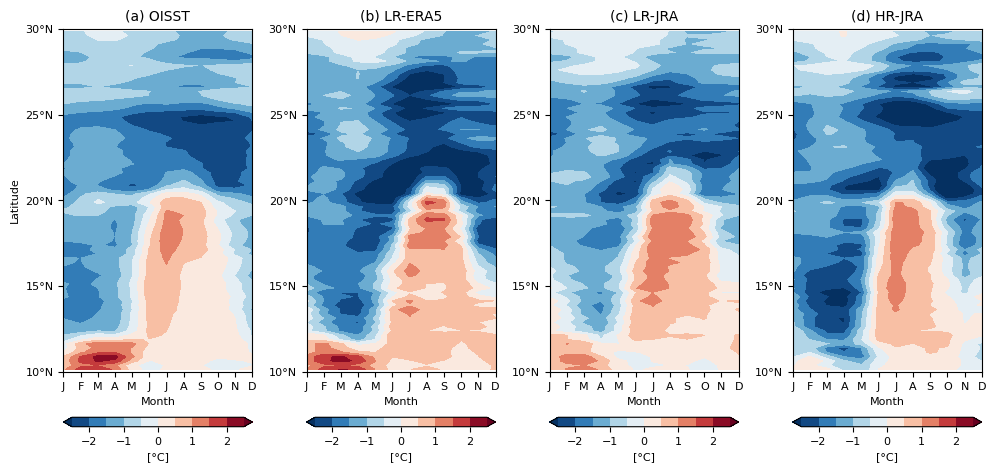

In [8]:
import numpy as np
import matplotlib.pyplot as plt

lat_min, lat_max = 10, 30
lat_mask = (latitudes >= lat_min) & (latitudes <= lat_max)
latitudes_subset = latitudes[lat_mask]  # 选取符合范围的纬度

fig, axes = plt.subplots(1, 4, figsize=(10, 5))
plt.rcParams.update({
    "font.size": 8,
})
labels = ['(a) OISST', '(b) LR-ERA5', '(c) LR-JRA', '(d) HR-JRA']
datasets = [sstum, sstu_fera5, sstu_fjra, sstu_tropo]
colormaps = ['RdBu_r', 'RdBu_r', 'RdBu_r', 'RdBu_r']  # 每个变量使用不同的 colormap
month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
cl = [2.5, 2.5, 2.5, 2.5]  # Chl 设定固定范围 (0,6)
colorbar_labels = ['[°C]', '[°C]',  '[°C]', '[°C]']  # Colorbar 的单位

plt.rcParams.update({
    "font.size": 8,
})

for i, (data, title, cmap, cbar_label, ax) in enumerate(zip(datasets, labels, colormaps, colorbar_labels, axes.flatten())):
    hov_data = np.nanmean(data, axis=-1)  # 沿最后一个维度取平均
    hov_data_subset = hov_data[:, lat_mask]  # 只取纬度 10-25°N 对应的数据
    
    # 设置 colorbar 范围
    if isinstance(cl[i], tuple):  # 针对 Chl 设定 (0,6)
        levels = np.linspace(cl[i][0], cl[i][1], 11)
        extend_option = 'max'  # 只在最大值方向扩展
    else:
        levels = np.linspace(-cl[i], cl[i], 11)
        extend_option = 'both'  # 其他变量两端都扩展

    c = ax.contourf(np.arange(12), latitudes_subset, hov_data_subset.T, 
                    levels=levels, extend=extend_option, cmap=cmap)
    
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Month')
    ax.set_xticks(np.arange(12))
    ax.set_xticklabels(month_labels)
    ax.set_ylim(lat_min, lat_max)  # 限制纬度范围
    if i == 0:
        ax.set_ylabel('Latitude')
    ax.set_yticks(np.arange(lat_min, lat_max + 1, 5))
    ax.set_yticklabels([f'{int(lat)}°N' for lat in np.arange(lat_min, lat_max + 1, 5)])
    # 添加 colorbar 并设置单位
    cbar = fig.colorbar(c, ax=ax, orientation='horizontal', pad=0.1)
    cbar.set_label(cbar_label)  # 设置 colorbar 的 label 为单位

plt.tight_layout()
# plt.savefig("fig2.png", dpi=300)
plt.show()

In [5]:
sstum.shape

(12, 100, 8)